In [1]:
import pandas as pd
import csv
import numpy as np
import re

import nltk
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
ps = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('C:\\Users\\smasango\\Desktop\\Portland Data Science\\toxicity_annotated_comments_unanimous.tsv', header=0, delimiter = "\t",quoting=csv.QUOTE_NONE,)
df.head(10)

,rev_id,comment,year,logged_in,ns,sample,split
0,527004.0,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2002,True,user,random,test
1,603474.0,`:Here I cannot answer your questions. I did ...,2003,True,article,random,train
2,808576.0,"NEWLINE_TOKENNEWLINE_TOKENIn fact, I've just d...",2003,True,user,random,dev
3,986363.0,16:13 1 Jun 2003 (UTC),2003,True,article,random,train
4,1433843.0,NEWLINE_TOKENNEWLINE_TOKEN:I replied on .,2003,True,user,random,train
5,1988528.0,NEWLINE_TOKENHA AH AHA HAHAHAHHAHAHAHHAHAH,2003,False,user,random,train
6,1988988.0,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKEN Reques...,2003,True,user,random,train
7,2078042.0,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2003,True,user,random,train
8,2747887.0,NEWLINE_TOKENNEWLINE_TOKENOh - well - if you p...,2004,True,user,random,test
9,2850252.0,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2004,True,user,random,test


In [3]:
# remove weird tab/newline TOKEN text
df['comment'] = df['comment'].str.replace('NEWLINE_TOKEN',' ')
df['comment'] = df['comment'].str.replace('TAB_TOKEN',' ')
df['comment'] = df['comment'].str.replace('Wikipedia',' ')
df['comment'] = df['comment'].str.replace('UTC',' ')
df['comment'] = df['comment'].str.replace('wikipedia',' ')

In [4]:
df.head(10)

,rev_id,comment,year,logged_in,ns,sample,split
0,527004.0,Is something like Managing_Urban_America g...,2002,True,user,random,test
1,603474.0,`:Here I cannot answer your questions. I did ...,2003,True,article,random,train
2,808576.0,"In fact, I've just done it for you.",2003,True,user,random,dev
3,986363.0,16:13 1 Jun 2003 ( ),2003,True,article,random,train
4,1433843.0,:I replied on .,2003,True,user,random,train
5,1988528.0,HA AH AHA HAHAHAHHAHAHAHHAHAH,2003,False,user,random,train
6,1988988.0,Request from Hi Tim - Is your page at s...,2003,True,user,random,train
7,2078042.0,I unprotected - assuming accidental/old v...,2003,True,user,random,train
8,2747887.0,"Oh - well - if you put it that way, all I ca...",2004,True,user,random,test
9,2850252.0,Hi I really appreciate that someone does ...,2004,True,user,random,test


In [5]:
df3 = pd.read_csv('C:\\Users\\smasango\\Desktop\\Portland Data Science\\toxicity_annotations_unanimous.tsv', header = 0, delimiter = "\t", quoting=csv.QUOTE_NONE,)
df3.head(15)

,rev_id,worker_id,toxicity,toxicity_score
0,527004.0,3802,0,0.0
1,527004.0,3942,0,0.0
2,527004.0,590,0,0.0
3,527004.0,481,0,0.0
4,527004.0,3944,0,0.0
5,527004.0,4172,0,0.0
6,527004.0,2419,0,0.0
7,527004.0,3323,0,0.0
8,527004.0,2851,0,0.0
9,527004.0,4175,0,0.0


In [6]:
uniqueScores = df3[["rev_id", "toxicity_score"]].groupby("rev_id", as_index=False).first()

In [7]:
# Add length column

df['length'] = df.comment.apply(lambda x: len(x))

In [8]:
mergedData = pd.merge(df, uniqueScores, on="rev_id")

mergedData.comment = mergedData.comment.apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

mergedData.comment = mergedData.comment.apply(str.lower)

# Stem the data

# Remove months

def remove_months(someString):
        listOfStrings = someString.split(' ')
        months = ['utc', 'jan','feb','mar','apr','may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec',
                  'january','february','march','april','may','june','july','august','september','october','november','december']
        return ' '.join([word for word in listOfStrings if word not in months])
    
mergedData.comment = mergedData.comment.apply(remove_months)

# Remove rows with blank comments

# mergedData = mergedData[mergedData.comment == 'sicelo']


#mergedData = mergedData[mergedData.comment.notnull()]

#mergedData.dropna(inplace=True)

#mergedData = mergedData[mergedData['comment'].str.len()>0]

mergedData.head(100)


,rev_id,comment,year,logged_in,ns,sample,split,length,toxicity_score
0,527004.0,is something like managingurbanamerica goi...,2002,True,user,random,test,91,0.0
1,603474.0,here i cannot answer your questions i did not...,2003,True,article,random,train,406,0.0
2,808576.0,in fact ive just done it for you,2003,True,user,random,dev,38,0.0
3,986363.0,,2003,True,article,random,train,23,0.0
4,1433843.0,i replied on,2003,True,user,random,train,19,0.0
5,1988528.0,ha ah aha hahahahhahahahhahah,2003,False,user,random,train,30,0.0
6,1988988.0,request from hi tim is your page at st...,2003,True,user,random,train,450,0.0
7,2078042.0,i unprotected assuming accidentalold van...,2003,True,user,random,train,183,0.0
8,2747887.0,oh well if you put it that way all i can s...,2004,True,user,random,test,183,0.0
9,2850252.0,hi i really appreciate that someone does ...,2004,True,user,random,test,500,0.0


In [9]:
mergedData[['logged_in', 'length', 'year', 'toxicity_score', 'rev_id']].corr(method='pearson')

,logged_in,length,year,toxicity_score,rev_id
logged_in,1.000000,-0.023741,0.070269,0.207620,0.070282
length,-0.023741,1.000000,-0.028690,0.034047,-0.031738
year,0.070269,-0.028690,1.000000,-0.013052,0.991147
toxicity_score,0.207620,0.034047,-0.013052,1.000000,-0.016787
rev_id,0.070282,-0.031738,0.991147,-0.016787,1.000000


In [10]:
comment = mergedData.loc[:, "comment"]
comment.head(17)

0         is something like managingurbanamerica goi...
1     here i cannot answer your questions  i did not...
2                     in fact ive just done it for you 
3                                                      
4                                       i replied on   
5                         ha ah aha hahahahhahahahhahah
6         request from   hi tim  is your page at  st...
7         i unprotected   assuming accidentalold van...
8       oh  well  if you put it that way all i can s...
9         hi  i really appreciate that someone does ...
10                                      medical qi gong
11      probably how long have you been editing anon...
12                                          archive    
13      just my two cents worth  i frequently hear b...
14         i took up on your offer and withdrew myself 
15      the ones who previously changed nationality ...
16    the last line does make it somewhat an objecti...
Name: comment, dtype: object

In [11]:
all_words = []
for word in comment:
    all_words.append(word)
print(all_words[:4])
magama = str(all_words)
#print(magama)

# How to turn list into a DataFrame
#pd.DataFrame(all_words, columns=['HT'])

['    is something like managingurbanamerica going to be a problem      ', 'here i cannot answer your questions  i did not write the above it was in the original article but towards the bottom  given the organization of the article such as it is i thought this kind of information belonged earlier so i moved it up  i do recall biologists using the word locus when refering to alleles so i didnt question the choice of words  but as i say i did not write this  ', '  in fact ive just done it for you ', '       ']


In [12]:
tokens = re.findall('\w+',magama)
tokens[:10]

['is',
 'something',
 'like',
 'managingurbanamerica',
 'going',
 'to',
 'be',
 'a',
 'problem',
 'here']

In [13]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')


# Create tokens
tokens = tokenizer.tokenize(magama)
tokens[:10]

['is',
 'something',
 'like',
 'managingurbanamerica',
 'going',
 'to',
 'be',
 'a',
 'problem',
 'here']

In [14]:
# Initialize new list
words = []

# Loop through list tokens and make lower case

for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check

words[:10]

['is',
 'something',
 'like',
 'managingurbanamerica',
 'going',
 'to',
 'be',
 'a',
 'problem',
 'here']

In [15]:
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers']

In [16]:
# Initialize new list
words_ns = []


# Add to words_ns all words that are in words but not in sw

for word in words:
    if word not in sw:
        words_ns.append(word.lower())


# Print several list items as sanity check
words_ns[:10]

['something',
 'like',
 'managingurbanamerica',
 'going',
 'problem',
 'cannot',
 'answer',
 'questions',
 'write',
 'original']

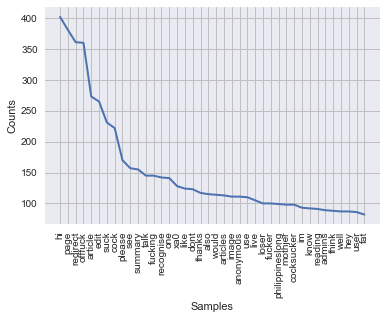

In [17]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Figures inline and set visualization style
%matplotlib inline
sns.set()


# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(40)



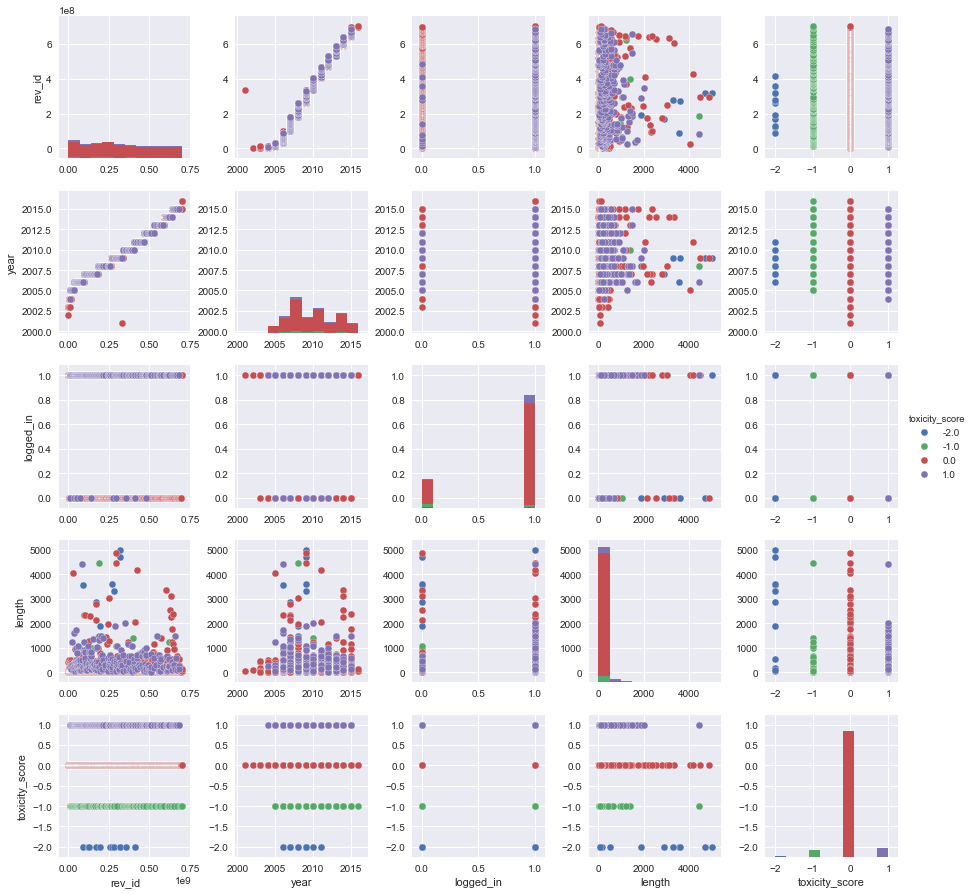

In [18]:
sns.pairplot(mergedData, hue = 'toxicity_score')


In [19]:
#  Want to look at comments with score -2 happened only in 2006 to 2012. How do I visualize most frequent words in that group?

gby = mergedData[["year", "toxicity_score"]].groupby("year", as_index=False).first()

Text(0,0.5,'toxicity score')

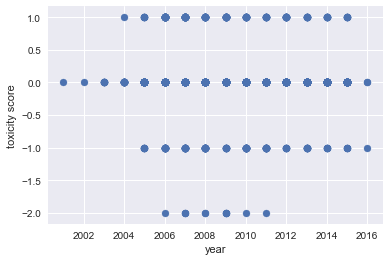

In [20]:
plt.scatter(mergedData['year'] ,mergedData['toxicity_score'])
plt.xlabel('year')
plt.ylabel('toxicity score')

In [21]:
kusha = mergedData.loc[:, ["comment", "toxicity_score", "year"]]
musa = []
for index, row in kusha.iterrows():
    if row['toxicity_score'] == -2:
        musa.append(row)
print(musa[:20])     
    

[comment             fucking cocksucking admins eat my shit cunts...
toxicity_score                                                   -2
year                                                           2006
Name: 574, dtype: object, comment             fuck you you fucking faggot this is sean mc ...
toxicity_score                                                   -2
year                                                           2007
Name: 729, dtype: object, comment           you suck you suck you suck you suck you suck y...
toxicity_score                                                   -2
year                                                           2007
Name: 778, dtype: object, comment              fuck offfuck offfuck offfuck offfuck offfuc...
toxicity_score                                                   -2
year                                                           2007
Name: 972, dtype: object, comment              jerk me jolly   fuckfuckfuckfuckfuckfuckfuc...
toxicity_sc

In [22]:
df_by_score = mergedData[['year', 'toxicity_score', 'rev_id', 'comment']].groupby('rev_id', as_index=False).first()
df_by_score.head(10)

,rev_id,year,toxicity_score,comment
0,527004.0,2002,0.0,is something like managingurbanamerica goi...
1,603474.0,2003,0.0,here i cannot answer your questions i did not...
2,808576.0,2003,0.0,in fact ive just done it for you
3,986363.0,2003,0.0,
4,1433843.0,2003,0.0,i replied on
5,1988528.0,2003,0.0,ha ah aha hahahahhahahahhahah
6,1988988.0,2003,0.0,request from hi tim is your page at st...
7,2078042.0,2003,0.0,i unprotected assuming accidentalold van...
8,2747887.0,2004,0.0,oh well if you put it that way all i can s...
9,2850252.0,2004,0.0,hi i really appreciate that someone does ...


In [23]:
# Remove all numeric characters and useless words

lamasha = re.sub('[^a-zA-Z\s]', '', str(musa))
lamasha = lamasha.replace('comment', '')
lamasha = lamasha.replace('toxicityscore', '')
lamasha = lamasha.replace('year', '')
lamasha = lamasha.replace('Name', '')
lamasha = lamasha.replace('dtype', '')
lamasha = lamasha.replace('object', '')
#print(lamasha)


In [24]:
tokens2 = tokenizer.tokenize(str(lamasha))
tokens2[:50]   

['fucking',
 'cocksucking',
 'admins',
 'eat',
 'my',
 'shit',
 'cunts',
 'fuck',
 'you',
 'you',
 'fucking',
 'faggot',
 'this',
 'is',
 'sean',
 'mc',
 'you',
 'suck',
 'you',
 'suck',
 'you',
 'suck',
 'you',
 'suck',
 'you',
 'suck',
 'y',
 'fuck',
 'offfuck',
 'offfuck',
 'offfuck',
 'offfuck',
 'offfuc',
 'jerk',
 'me',
 'jolly',
 'fuckfuckfuckfuckfuckfuckfuc',
 'fuck',
 'you',
 'go',
 'suck',
 'on',
 'a',
 'fat',
 'dick',
 'faggot',
 'mothe',
 'you',
 'are',
 'a']

In [25]:
words2 = []

for word in tokens2:
    words2.append(word.lower())

words2[:10]

['fucking',
 'cocksucking',
 'admins',
 'eat',
 'my',
 'shit',
 'cunts',
 'fuck',
 'you',
 'you']

In [26]:
words_ns2 = []

for word in words2:
    if word not in sw:
        words_ns2.append(word.lower())

words_ns2[:10]

['fucking',
 'cocksucking',
 'admins',
 'eat',
 'shit',
 'cunts',
 'fuck',
 'fucking',
 'faggot',
 'sean']

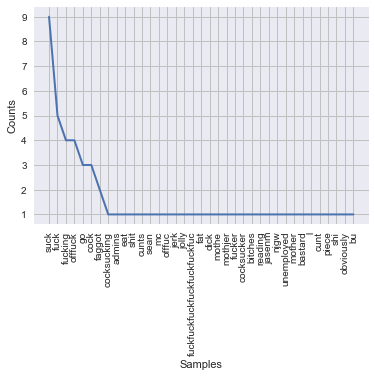

In [27]:
# Visualize the frequency distribution of words with particular score
freqdist2 = nltk.FreqDist(words_ns2)
freqdist2.plot(50)

In [28]:
def get_train_test(mergedData, useToxicityScore):
    if (useToxicityScore):
        pos = mergedData.loc[mergedData.toxicity_score > 0]
        neg = mergedData.loc[mergedData.toxicity_score < 0]
    #else:
        #pos = mergedData.loc[mergedData.toxicity == 0]
        #neg = mergedData.loc[mergedData.toxicity == 1]
        
    trainPos=pos.sample(frac=0.8,random_state=200)
    testPos=pos.drop(trainPos.index)
    
    trainNeg=neg.sample(frac=0.8,random_state=200)
    testNeg=neg.drop(trainNeg.index)
    
    training = trainPos.append(trainNeg)
    test =  testPos.append(testNeg)
    return training, test

train_set, test_set = get_train_test(mergedData, True)
all_words_train = train_set.comment
all_words_test = test_set.comment

In [29]:
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2),  \
                             stop_words='english',  strip_accents='unicode',  norm='l2')

X_train = vectorizer.fit_transform(all_words_train)
X_test = vectorizer.transform(all_words_test)

NBclassifier = MultinomialNB()
NBclassifier.fit(X_train, train_set.toxicity_score)
resultNB = NBclassifier.predict(X_test)
print(NBclassifier.score(X_test, test_set.toxicity_score))

0.848101265823


In [30]:
# My naive attempt at ML
data_inputs = mergedData[["comment", "year", "length"]]
data_inputs.head()

,comment,year,length
0,is something like managingurbanamerica goi...,2002,91
1,here i cannot answer your questions i did not...,2003,406
2,in fact ive just done it for you,2003,38
3,,2003,23
4,i replied on,2003,19


In [31]:
expected_output = mergedData[["toxicity_score"]]
expected_output.head()

,toxicity_score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [32]:
pos_neg = []

for row in mergedData['toxicity_score']:
    if row < 0:
        pos_neg.append('Neg')
    elif row > 0:
        pos_neg.append('Pos')
    else:
        pos_neg.append('Neut')
        
# Create new column using list

mergedData['Class'] = pos_neg

mergedData.head(100)

,rev_id,comment,year,logged_in,ns,sample,split,length,toxicity_score,Class
0,527004.0,is something like managingurbanamerica goi...,2002,True,user,random,test,91,0.0,Neut
1,603474.0,here i cannot answer your questions i did not...,2003,True,article,random,train,406,0.0,Neut
2,808576.0,in fact ive just done it for you,2003,True,user,random,dev,38,0.0,Neut
3,986363.0,,2003,True,article,random,train,23,0.0,Neut
4,1433843.0,i replied on,2003,True,user,random,train,19,0.0,Neut
5,1988528.0,ha ah aha hahahahhahahahhahah,2003,False,user,random,train,30,0.0,Neut
6,1988988.0,request from hi tim is your page at st...,2003,True,user,random,train,450,0.0,Neut
7,2078042.0,i unprotected assuming accidentalold van...,2003,True,user,random,train,183,0.0,Neut
8,2747887.0,oh well if you put it that way all i can s...,2004,True,user,random,test,183,0.0,Neut
9,2850252.0,hi i really appreciate that someone does ...,2004,True,user,random,test,500,0.0,Neut


In [33]:
# Visualize specific comment

mergedData.get_value(97, 'comment')

'   excuse me whoever the fuck you are   spui says on his talk page that he likes vandalism and doesnt want it reverted the modification that i made was to text originally left by a vandal please do your homework before censoring others'

In [34]:
train_set, test_set = train_test_split(mergedData, test_size=0.3, random_state=666)
all_words_train = train_set.comment
all_words_test = test_set.comment

all_words_train.head()

1522        injury   httpwwwprowrestlingnetartmanpubli...
2060                               i am editing this page
140                      on google did anything come up  
1716     yes yes i saw that swhy i didnt revert your e...
268       the edit history shows two editors accusing ...
Name: comment, dtype: object

In [35]:
# Need to understand what this does

vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2),  \
                             stop_words='english',  strip_accents='unicode',  norm='l2')

X_train = vectorizer.fit_transform(all_words_train)
X_test = vectorizer.transform(all_words_test)

NBclassifier = MultinomialNB()
NBclassifier.fit(X_train, train_set.toxicity_score)
resultNB = NBclassifier.predict(X_test)
print(NBclassifier.score(X_test, test_set.toxicity_score))

0.891162790698


In [36]:
# Only 12 highly toxic comments. Classifier will have bias towards predicting neutral comments
mergedData.groupby('toxicity_score').describe()

length                                                 \
                 count         mean          std   min    25%     50%   
toxicity_score                                                          
-2.0              12.0  2163.000000  1910.167817  62.0  152.5  2383.0   
-1.0             159.0   186.911950   405.172527  22.0   47.0    79.0   
 0.0            3187.0    89.925008   249.854080   5.0   30.0    42.0   
 1.0             224.0   449.366071   461.222639  24.0  174.5   301.5   

                                 rev_id                 ...                 \
                    75%     max   count          mean   ...            75%   
toxicity_score                                          ...                  
-2.0            3570.25  5000.0    12.0  2.427436e+08   ...    316231835.5   
-1.0             184.50  4461.0   159.0  2.991569e+08   ...    436055748.0   
 0.0              70.00  4886.0  3187.0  3.299798e+08   ...    503621652.5   
 1.0             581.00  4436.0   224.0  2.791115e+08   ...    438444460.5   

                               year                                         \
                        max   count         mean       std     min     25%   
toxicity_score                                                               
-2.0            412618110.0    12.0  2008.333333  1.435481  2006.0  2007.0   
-1.0            699660419.0   159.0  2009.201258  2.680874  2005.0  2007.0   
 0.0            697971737.0  3187.0  2009.629746  2.996603  2001.0  2007.0   
 1.0            683965519.0   224.0  2008.959821  2.761554  2004.0  2007.0   

                                        
                   50%     75%     max  
toxicity_score                          
-2.0            2008.5  2009.0  2011.0  
-1.0            2009.0  2011.0  2016.0  
 0.0            2009.0  2012.0  2016.0  
 1.0            2008.0  2011.0  2015.0  

[4 rows x 24 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001E41A97588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000001E41A5F400>]], dtype=object)

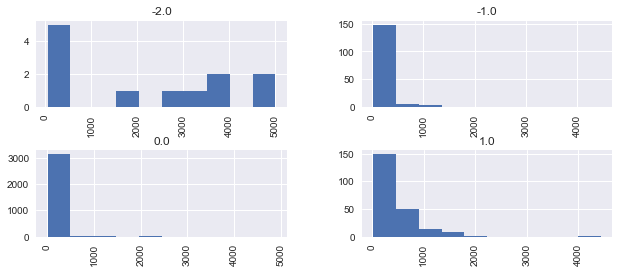

In [37]:
mergedData.hist(column='length',by ='toxicity_score',bins=10,figsize = (10,4))

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [39]:
#print(vectorizer)

#CountVectorizer(analyzer=mergedData['comment'])

# list of text documents
#text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(words_ns)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(words_ns)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())




{'something': 7860, 'like': 4890, 'managingurbanamerica': 5119, 'going': 3455, 'problem': 6586, 'cannot': 1237, 'answer': 378, 'questions': 6734, 'write': 9891, 'original': 6063, 'article': 512, 'towards': 9016, 'bottom': 1034, 'given': 3424, 'organization': 6003, 'thought': 8875, 'kind': 4629, 'information': 4224, 'belonged': 851, 'earlier': 2548, 'moved': 5505, 'recall': 6866, 'biologists': 915, 'using': 9353, 'word': 9789, 'locus': 4973, 'refering': 6921, 'alleles': 252, 'didnt': 2305, 'question': 6730, 'choice': 1427, 'words': 9793, 'say': 7412, 'fact': 2922, 'ive': 4382, 'done': 2445, 'replied': 7035, 'ha': 3579, 'ah': 185, 'aha': 186, 'hahahahhahahahhahah': 3593, 'request': 7063, 'hi': 3742, 'tim': 8920, 'page': 6124, 'still': 8089, 'necessary': 5635, 'often': 5910, 'one': 5947, 'two': 9146, 'pages': 6128, 'linking': 4912, 'otherwise': 6079, 'nonexistent': 5760, 'userdaniel': 9333, 'quinlanredirectsf': 6741, 'daniels': 2057, 'used': 9322, 'updates': 9293, 'could': 1888, 'remove':

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [40]:
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(words_ns)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
X_test = vectorizer.transform([words_ns])
# summarize encoded vector
print(X_test.shape)
print(X_test.toarray())

{'something': 7860, 'like': 4890, 'managingurbanamerica': 5119, 'going': 3455, 'problem': 6586, 'cannot': 1237, 'answer': 378, 'questions': 6734, 'write': 9891, 'original': 6063, 'article': 512, 'towards': 9016, 'bottom': 1034, 'given': 3424, 'organization': 6003, 'thought': 8875, 'kind': 4629, 'information': 4224, 'belonged': 851, 'earlier': 2548, 'moved': 5505, 'recall': 6866, 'biologists': 915, 'using': 9353, 'word': 9789, 'locus': 4973, 'refering': 6921, 'alleles': 252, 'didnt': 2305, 'question': 6730, 'choice': 1427, 'words': 9793, 'say': 7412, 'fact': 2922, 'ive': 4382, 'done': 2445, 'replied': 7035, 'ha': 3579, 'ah': 185, 'aha': 186, 'hahahahhahahahhahah': 3593, 'request': 7063, 'hi': 3742, 'tim': 8920, 'page': 6124, 'still': 8089, 'necessary': 5635, 'often': 5910, 'one': 5947, 'two': 9146, 'pages': 6128, 'linking': 4912, 'otherwise': 6079, 'nonexistent': 5760, 'userdaniel': 9333, 'quinlanredirectsf': 6741, 'daniels': 2057, 'used': 9322, 'updates': 9293, 'could': 1888, 'remove':

AttributeError: 'list' object has no attribute 'lower'

In [41]:
train_set_df, test_set_df = train_test_split(mergedData, test_size=0.2, random_state=987)
all_words_train = train_set_df.comment
all_words_test = test_set_df.comment

print(all_words_test)

1829                                  what sources  tim  
2746     what i dont even really have an idea of what ...
20        the person who added the sections  is extrem...
2582     i said i was retiring out of insomnia induced...
2791                              re yinxiang magazine   
2571      connected contributorwwb toowwb tooeditedhereno
2880       space cowboy   the song reminds me of space...
1359                                            why so   
539                      at the very least to the racovis
595                                                   ...
2334          filejpg also tagged as a copyvio from      
544                                please do not reinsert
784                       i mirror the comment made by   
735      czar baldy bald doesnt have enough info to ge...
3442                                          how sad    
200                           the internet movie database
717                                           vietminh   
2201     notic

In [43]:
# Looks like can think of X as input column and Y as output column
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 3),
                             stop_words='english',  strip_accents='unicode',  norm='l2',          
                             max_features = 5000)

X_train = vectorizer.fit_transform(all_words_train)
X_test = vectorizer.transform(all_words_test)

Y_train = train_set_df.toxicity_score
Y_test = test_set_df.toxicity_score
print(X_test)

  (0, 3092)	0.799307448786
  (0, 2762)	0.600922293076
  (1, 3483)	0.451950448617
  (1, 2975)	0.502426729783
  (1, 2403)	0.426328421534
  (1, 1427)	0.490466843887
  (1, 918)	0.347842673107
  (2, 3456)	0.219818429839
  (2, 3313)	0.199091772185
  (2, 2935)	0.179898899248
  (2, 2637)	0.219818429839
  (2, 2548)	0.235093263412
  (2, 2537)	0.185037607942
  (2, 2485)	0.341039667394
  (2, 2311)	0.226490923251
  (2, 2262)	0.214366605758
  (2, 2176)	0.175515126068
  (2, 2163)	0.226490923251
  (2, 1835)	0.235093263412
  (2, 1761)	0.159172241594
  (2, 1390)	0.166240797038
  (2, 1197)	0.176906179029
  (2, 1087)	0.235093263412
  (2, 968)	0.226490923251
  (2, 966)	0.27689116788
  :	:
  (707, 325)	0.622525673775
  (708, 3191)	0.483100632832
  (708, 2999)	0.593860329286
  (708, 2623)	0.593860329286
  (708, 2422)	0.247535042285
  (709, 2960)	0.518102624373
  (709, 2424)	0.763162819619
  (709, 2422)	0.386202254485
  (710, 310)	0.720159764714
  (710, 75)	0.693808268391
  (711, 2509)	1.0
  (712, 2422)	1.0
 

In [44]:
# Which classifier to use and accurate is it?

# Here I started with the RandomForestClassifier

# Here is a link that helped guide me through this: http://benalexkeen.com/random-forests-in-python-using-scikit-learn/

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [45]:
print(Y_train.shape)
print(Y_test.shape)
print(X_test.shape)

(2865,)
(717,)
(717, 3489)


In [46]:
random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)

In [47]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [59]:
# This function computes subset accuracy. The set of labels predicted (Y_predict) for a sample must exactly match 
# the corresponding set of labels in Y_test
y_predict = random_forest.predict(X_test)
accuracy_score(Y_test, y_predict)

0.88563458856345889

In [73]:
# Create DataFrame of Actual vs Predicted
df_compare = pd.DataFrame({'Actual': [Y_test], 'Predicted': [y_predict]})  
print(Y_test, y_predict)

1829    0.0
2746    0.0
20      0.0
2582    0.0
2791    0.0
2571    0.0
2880    0.0
1359    0.0
539     0.0
595     0.0
2334    0.0
544     0.0
784     0.0
735     0.0
3442    0.0
200     0.0
717     0.0
2201    0.0
3435    0.0
1845    0.0
488     0.0
1163    0.0
3338    0.0
312     0.0
2340    0.0
1265    0.0
754     0.0
2672    0.0
267     0.0
2742    1.0
       ... 
172     0.0
2425    0.0
2479    0.0
2850    0.0
2377    0.0
1112    0.0
451     0.0
1396    0.0
1780    0.0
2158    1.0
2888    0.0
270     0.0
3542    0.0
3044    0.0
3408    0.0
2380    0.0
564     0.0
2593    0.0
1217    0.0
485     0.0
926     0.0
3082    0.0
2511    0.0
3395    0.0
2073    0.0
1574    0.0
2552    0.0
449     0.0
815     0.0
643     0.0
Name: toxicity_score, Length: 717, dtype: float64 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [49]:
# How do I interpret this confusion matrix? 
# Toxicity_Score for Y_train has four categories (-2, -1, 0, 1), resulting in a 4x4 matrix (predictions for each category).
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_predict)

array([[  0,   0,   2,   0],
       [  0,   0,  26,   0],
       [  0,   0, 632,   0],
       [  0,   0,  54,   3]], dtype=int64)

In [51]:
# Ideas
# Take a look at non-unanimous data toxicity_scores and calculate mean and spread
# 